<h1>Импорт библиотек

In [6]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [13]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if type(X) != np.ndarray or type(V) != np.ndarray:
        X = np.array(X)
        V = np.array(V)
    p = len(X)
    result = 0
    for i in range(p):
        result += np.dot(X[i], V[i])
    return result

def test_1():
    X = np.array([
        np.array([
            [5, 0], 
            [0, 2]
        ]), 
        np.array([
            [9, 7], 
            [4, 8]
        ])
    ])
    
    V = np.array([
        np.array([
            [7], 
            [1]
        ]), 
        np.array([
            [9], 
            [5]
        ])
    ])
    return sum_prod(X, V)
    
def test_2():
    X = np.array([
        np.array([
            [0, 7], 
            [9, 7]
        ]), 
        np.array([
            [0, 5], 
            [8, 5]
        ]), 
        np.array([
            [4, 6], 
            [9, 7]
        ])
    ])
    
    V = np.array([
        np.array([
            [0], 
            [7]
        ]), 
        np.array([
            [4], 
            [3]
        ]), 
        np.array([
            [5], 
            [9]
        ])
    ])
    return sum_prod(X, V)

print(test_1())
print()
print(test_2())

[[151]
 [ 78]]

[[138]
 [204]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [14]:
def binarize(M, threshold=0.5):
    if M.dtype != int and M.dtype != float:
        return "Некоректные вводные данные"
    return np.where(M > threshold, 1, 0)

def test_1():
    M = np.array([[0.2, 0.8], [0.6, 0.4]])
    threshold = 0.5
    return binarize(M, threshold) # [[0 1] [1 0]]

def test_Error():
    M = np.array([['', 0.9], [0.3, "fas"]])
    threshold = 0.3
    return binarize(M, threshold) # Некоректные вводные данные

def test_3():
    M = np.array([[0.6, 0.7, 0.8], [0.1, 0.2, 0.3]])
    threshold = 0.6
    return binarize(M, threshold) # [[0 1 1] [0 0 0]]

def test_4():
    M = np.array([[0, 0.5, 0.6], [0.7, 0.5, -1]])
    threshold = 0.7
    return binarize(M, threshold) # [[0 0 0] [0 1 1]]

def test_5():
    M = np.array([[0.9, 0.8, 0.7], [0.6, 0.5, 0.4]])
    threshold = 0.5
    return binarize(M, threshold) # [[1 1 1] [1 0 0]]

print(test_1())  # [[0 1] [1 0]]
print()
print(test_Error()) # Некоректные вводные данные
print()
print(test_3()) # [[0 1 1] [0 0 0]]
print()
print(test_4()) # [[0 0 0] [0 1 1]]
print()
print(test_5()) # [[1 1 1] [1 0 0]]

[[0 1]
 [1 0]]

Некоректные вводные данные

[[0 1 1]
 [0 0 0]]

[[0 0 0]
 [0 0 0]]

[[1 1 1]
 [1 0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [15]:
def unique_rows(mat):
    arrays = [np.unique(row) for row in mat]
    return arrays

def unique_columns(mat):
    arrays = [np.unique(column) for column in mat.T]
    return arrays

def test_allanother():
    mat = np.array(
        [
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
        ])
    print(mat)
    print(f'В строках: {unique_rows(mat)}')
    print(f'В столбцах: {unique_columns(mat)}')
    print()
    
def test_one_only():
    mat = np.array(
        [
        [1, 1], 
        [1, 1], 
        [1, 1]
        ])
    print(mat)
    print(f'В строках: {unique_rows(mat)}')
    print(f'В столбцах: {unique_columns(mat)}')
    print()
    
def test_one_two_three_four():
    mat = np.array(
        [
        [1, 2, 3, 4], 
        [1, 2, 3, 4]
        ])
    print(mat)
    print(f'В строках: {unique_rows(mat)}')
    print(f'В столбцах: {unique_columns(mat)}')
    print()

test_allanother()
test_one_only()
test_one_two_three_four()

[[1 2 3]
 [4 5 6]
 [7 8 9]]
В строках: [array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
В столбцах: [array([1, 4, 7]), array([2, 5, 8]), array([3, 6, 9])]

[[1 1]
 [1 1]
 [1 1]]
В строках: [array([1]), array([1]), array([1])]
В столбцах: [array([1]), array([1])]

[[1 2 3 4]
 [1 2 3 4]]
В строках: [array([1, 2, 3, 4]), array([1, 2, 3, 4])]
В столбцах: [array([1]), array([2]), array([3]), array([4])]



<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Размер матрицы = (0, 1)
Не может быть такой матрицы

Размер матрицы = (1, -7)
Не может быть такой матрицы

Размер матрицы = (1, 1)
[[0.31636793]]
Мат  ожидание строки [0.31636793]
Дисперсия строки [0.31636793]
Мат  ожидание столбца [0.31636793]
Дисперсия столбца [0.]


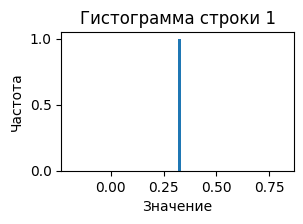

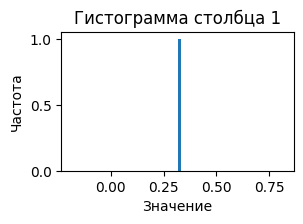


Размер матрицы = (2, 2)
[[-2.30405797 10.16737813]
 [ 4.52106315 -5.46810797]]
Мат  ожидание строки [ 3.93166008 -0.47352241]
Дисперсия строки [1.10850259 2.34963508]
Мат  ожидание столбца [1.10850259 2.34963508]
Дисперсия столбца [11.64556959 61.1171064 ]


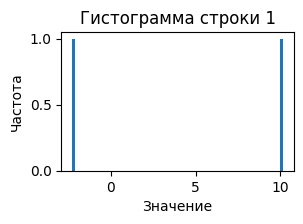

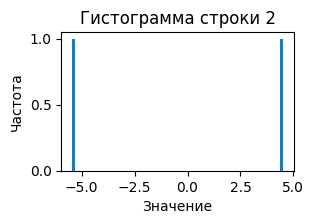

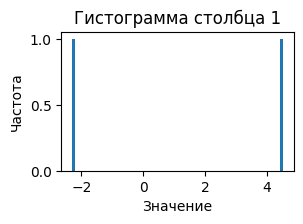

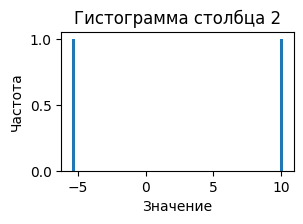


Размер матрицы = (3, 3)
[[ -5.90132308  -2.03986494   7.50291711]
 [  1.9531481   13.86878381   0.71331824]
 [-11.28345295   3.01406033  -6.27625283]]
Мат  ожидание строки [-0.1460903   5.51175005 -4.84854848]
Дисперсия строки [-5.07720931  4.94765973  0.64666084]
Мат  ожидание столбца [-5.07720931  4.94765973  0.64666084]
Дисперсия столбца [29.54084963 44.05025415 31.64647563]


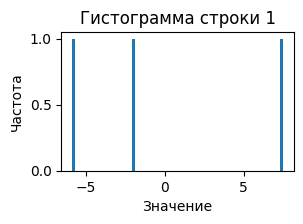

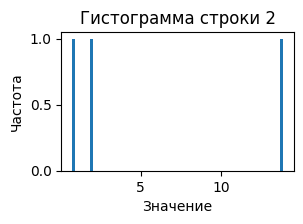

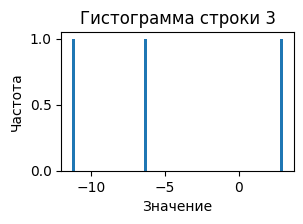

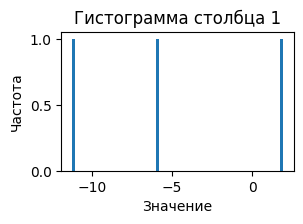

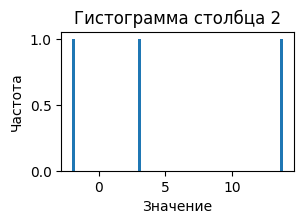

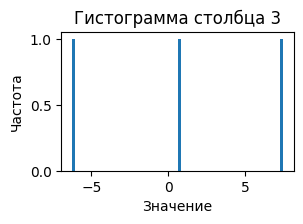


Размер матрицы = (3, 2)
[[-17.98319389 -18.97762935]
 [-12.78681482   1.09791133]
 [-12.06443545 -15.03847563]]
Мат  ожидание строки [-18.48041162  -5.84445175 -13.55145554]
Дисперсия строки [-14.27814805 -10.97273122]
Мат  ожидание столбца [-14.27814805 -10.97273122]
Дисперсия столбца [ 6.95065432 75.43636105]


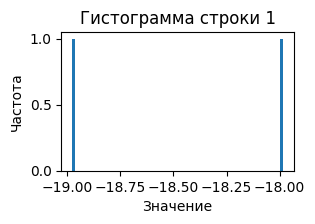

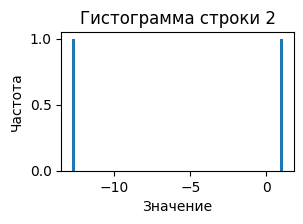

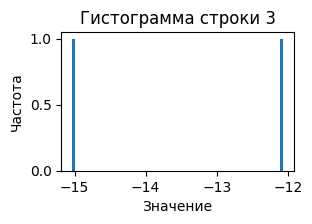

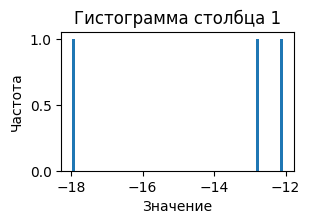

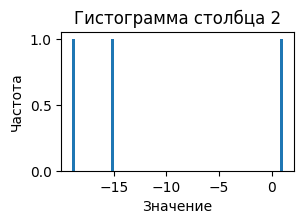


Размер матрицы = (2, 3)
[[  1.07991723  -5.67800886  -6.27794938]
 [-17.21516006 -14.89916416  -8.08966787]]
Мат  ожидание строки [ -3.625347  -13.4013307]
Дисперсия строки [ -8.06762141 -10.28858651  -7.18380862]
Мат  ожидание столбца [ -8.06762141 -10.28858651  -7.18380862]
Дисперсия столбца [83.67746329 21.25742628  0.82058097]


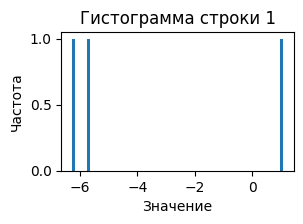

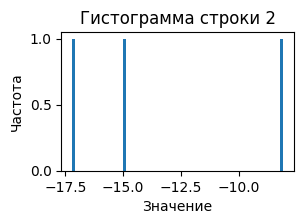

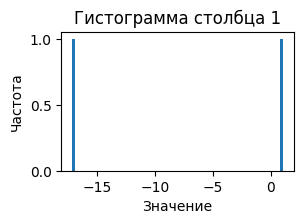

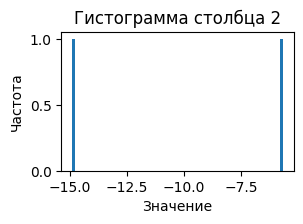

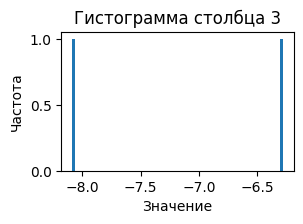

In [17]:
def start(m, n):
    m, n = int(m), int(n)
    print(f'Размер матрицы = ({m}, {n})')
    if m < 1 or n < 1:
        print("Не может быть такой матрицы")
        print()
        return
    mat = fill_matrix(m, n)
    print_stats(mat)
    plot_histograms(mat)
    print()

def fill_matrix(m, n):
    m = int(m)
    n = int(n)
    if m < 0 or n < 0 :
        return "Некоректные вводные данные"
    return np.random.normal(0, 10, size = (m, n))

def calculate_stats(mat):
    row_means = np.mean(mat, axis = 1)
    row_vars = np.var(mat, axis = 1)
    col_means = np.mean(mat, axis = 0)
    col_vars = np.var(mat, axis = 0)
    return row_means, row_vars, col_means, col_vars

def print_stats(mat):
    print(mat)
    row_means, row_vars, col_means, col_vars = calculate_stats(mat)
    print("Мат  ожидание строки", row_means)
    print("Дисперсия строки", col_means)
    print("Мат  ожидание столбца", col_means)
    print("Дисперсия столбца", col_vars)

def plot_histograms(matrix):
    m, n = matrix.shape
    
    for i in range(m):
        plt.figure(figsize = [3, 1.8])
        plt.hist(matrix[i], bins = 70)
        plt.title(f'Гистограмма строки {i + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    
    for j in range(n):
        plt.figure(figsize = [3, 1.8])
        plt.hist(matrix[:, j], bins = 70)
        plt.title(f'Гистограмма столбца {j + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    
    plt.show()

start(0, 1.0)
start(1, -7)

start("1", 1)
start(2, '2')
start(3, 3.0)

start(3, 2)
start(2, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [18]:
def chess(m, n, a, b):
    if type(m) != int or type(n) != int or type(a) != int or type(b) != int or m < 0 or n < 0: 
        return "Некоректные вводные данные"
    mat = np.zeros((m, n))
    for i in range(int(m)):
        for j in range(int(n)):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    return mat

def test_normal_chess():
    return chess(8, 8, 0, 1)

def test_column_chess():
    return chess(5, 2, 0, 1)

def test_row_chess():
    return chess(1, 6, 1, -1)

def test_null_chess():
    return chess(70, 0, 1, 2)
    
def test_Error_minus():
    return chess(-1, 3, 0, 1)

def test_Error_string():
    return chess(6, 'a', 0, 1)

print(test_normal_chess())
print()
print(test_column_chess())
print()
print(test_row_chess())
print()
print(test_null_chess())
print()
print(test_Error_minus())
print()
print(test_Error_string())

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]

[[ 1. -1.  1. -1.  1. -1.]]

[]

Некоректные вводные данные

Некоректные вводные данные


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


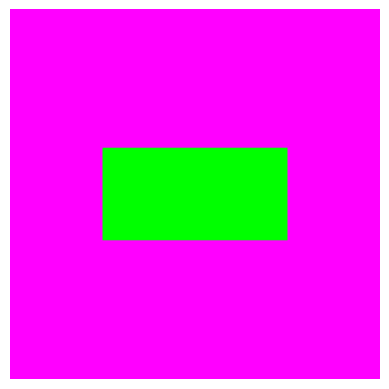

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


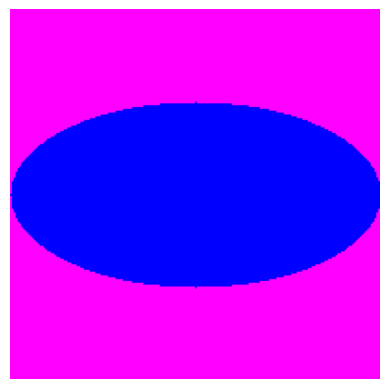

In [19]:
def draw_rectangle(a, b, m, n, background_color, rectangle_color):
    img = np.zeros((m, n, 3))
    img[:, :] = background_color
    x_start = (m - a) // 2
    x_end = x_start + a
    y_start = (n - b) // 2
    y_end = y_start + b
    img[x_start:x_end, y_start:y_end] = rectangle_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, background_color, ellipse_color):
    img = np.zeros((m, n, 3))
    img[:, :] = background_color
    x0 = m // 2
    y0 = n // 2
    for x in range(m):
        for y in range(n):
            if ((x - x0) ** 2 / a ** 2 + (y - y0) ** 2 / b ** 2) <= 1:
                img[x, y] = ellipse_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()

a = 50
b = 100
m = 200
n = 200
rectangle_color = [0, 255, 0]
ellipse_color = [0, 0, 255]
background_color = [255, 0, 255]
draw_rectangle(a, b, m, n, background_color, rectangle_color)
draw_ellipse(a, b, m, n, background_color, ellipse_color)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [20]:
def calculate_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_deviation = np.std(time_series)
    return mean, variance, std_deviation

def find_local_extrema(time_series):
    local_maxima = []
    local_minima = []
    if time_series[0] > time_series[1]:
        local_maxima.append(time_series[0])
    elif time_series[0] < time_series[1]:
        local_minima.append(time_series[0])
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append(time_series[i])
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append(time_series[i])
    if time_series[-1] > time_series[-2]:
        local_maxima.append(time_series[-1])
    elif time_series[-1] < time_series[-2]:
        local_minima.append(time_series[-1])
    return local_maxima, local_minima

def moving_average(time_series, p):
    return np.convolve(time_series, np.ones(p), 'valid') / p

def test(time_series, p = 2):
    mean, variance, std_deviation = calculate_statistics(time_series)
    local_maxima, local_minima = find_local_extrema(time_series)
    moving_avg = moving_average(time_series, p)
    
    print(f'Временной ряд = {time_series}')
    print(f'Математическое ожидание = {mean}')
    print(f'Дисперсия = {variance},')
    print(f'СКО = {std_deviation},')
    print(f'Локальные максимумы = {local_maxima},')
    print(f'Локальные минимумы = {local_minima},')
    print(f'размер окна = {p},')
    print(f'Скользящее среднее = {moving_avg},')


test([1, 2, 3, 4, 5], 3)
print()
test([1, 3, 2, 4, 1, 5], 3)
print()
test([3, 2, 9, 7, 9, 2, 4], 8)

Временной ряд = [1, 2, 3, 4, 5]
Математическое ожидание = 3.0
Дисперсия = 2.0,
СКО = 1.4142135623730951,
Локальные максимумы = [5],
Локальные минимумы = [1],
размер окна = 3,
Скользящее среднее = [2. 3. 4.],

Временной ряд = [1, 3, 2, 4, 1, 5]
Математическое ожидание = 2.6666666666666665
Дисперсия = 2.222222222222222,
СКО = 1.4907119849998596,
Локальные максимумы = [3, 4, 5],
Локальные минимумы = [1, 2, 1],
размер окна = 3,
Скользящее среднее = [2.         3.         2.33333333 3.33333333],

Временной ряд = [3, 2, 9, 7, 9, 2, 4]
Математическое ожидание = 5.142857142857143
Дисперсия = 8.408163265306124,
СКО = 2.899683304312063,
Локальные максимумы = [3, 9, 9, 4],
Локальные минимумы = [2, 7, 2],
размер окна = 8,
Скользящее среднее = [4.5 4.5],


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [21]:
def one_hot_encoding(labels):
    n_classes = np.max(labels) + 1
    encoded_labels = np.zeros((len(labels), n_classes))
    for i, label in enumerate(labels):
        encoded_labels[i, label] = 1
    return encoded_labels

print(one_hot_encoding([0, 2, 3, 0]))
print()
print(one_hot_encoding([2, 3, 4, 0]))
print()
print(one_hot_encoding([1, 0, 3]))
print()
print(one_hot_encoding([0, 0, 0]))
print()
print(one_hot_encoding([1, 1, 1]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

[[1.]
 [1.]
 [1.]]

[[0. 1.]
 [0. 1.]
 [0. 1.]]
